#**Crime analysis in Toronto during 2014 - 2022**

The dataset includes all Major Crime Indicators (MCI) occurrences by reported date and related offences from 2014 to June 30, 2022. 

Dataset Source: [Toronto Police](https://data.torontopolice.on.ca/datasets/TorontoPS::major-crime-indicators-1/explore?location=43.805569%2C-79.320942%2C9.58)



##Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import date, timedelta, datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/python/FinPro_Muthia Aisyah Putri/Major_Crime_Indicators.csv')
df.head()

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,-8.850398e+06,5.429359e+06,201,GO-20141273318,D31,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,...,3.0,3.0,Friday,11,Assault,27,York University Heights,-79.504475,43.766371,1
1,-8.818405e+06,5.436836e+06,202,GO-20141274349,D42,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,...,3.0,3.0,Friday,14,Break and Enter,132,Malvern,-79.217083,43.814861,2
2,-8.853791e+06,5.402071e+06,203,GO-20141274052,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Open Areas (Lakes, Parks, Rivers)",Outside,1430,...,3.0,3.0,Friday,13,Assault,19,Long Branch,-79.534957,43.589085,3
3,-8.832822e+06,5.419628e+06,204,GO-20141276966,D53,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2130,...,3.0,3.0,Friday,12,Theft Over,55,Thorncliffe Park,-79.346588,43.703212,4
4,-8.853452e+06,5.410706e+06,205,GO-20141274457,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Convenience Stores,Commercial,1610,...,3.0,3.0,Friday,14,Robbery,14,Islington-City Centre West,-79.531916,43.645247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301233 entries, 0 to 301232
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    301233 non-null  float64
 1   Y                    301233 non-null  float64
 2   Index_               301233 non-null  int64  
 3   event_unique_id      301233 non-null  object 
 4   Division             301233 non-null  object 
 5   occurrencedate       301233 non-null  object 
 6   reporteddate         301233 non-null  object 
 7   location_type        301233 non-null  object 
 8   premises_type        301233 non-null  object 
 9   ucr_code             301233 non-null  int64  
 10  ucr_ext              301233 non-null  int64  
 11  offence              301233 non-null  object 
 12  reportedyear         301233 non-null  int64  
 13  reportedmonth        301233 non-null  object 
 14  reportedday          301233 non-null  int64  
 15  reporteddayofyear

###Feature Treats and Selection 1

In [5]:
df1 = df[['Division','reporteddate','occurrencedate','location_type','premises_type','occurrencedayofweek','mci_category','Hood_ID','Neighbourhood','Longitude','Latitude']]
df1

,Division,reporteddate,occurrencedate,location_type,premises_type,occurrencedayofweek,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude
0,D31,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,Friday,Assault,27,York University Heights,-79.504475,43.766371
1,D42,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Friday,Break and Enter,132,Malvern,-79.217083,43.814861
2,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Open Areas (Lakes, Parks, Rivers)",Outside,Friday,Assault,19,Long Branch,-79.534957,43.589085
3,D53,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,Friday,Theft Over,55,Thorncliffe Park,-79.346588,43.703212
4,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Convenience Stores,Commercial,Friday,Robbery,14,Islington-City Centre West,-79.531916,43.645247
...,...,...,...,...,...,...,...,...,...,...,...
301228,D32,2022/06/29 04:00:00+00,2022/06/28 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Tuesday,Auto Theft,35,Westminster-Branson,-79.455098,43.790363
301229,D43,2022/06/29 04:00:00+00,2022/06/28 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Tuesday,Auto Theft,137,Woburn,-79.234954,43.775740
301230,D41,2022/06/29 04:00:00+00,2022/05/20 04:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,Friday,Auto Theft,126,Dorset Park,-79.281037,43.765801
301231,D41,2022/06/29 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Wednesday,Auto Theft,NSA,NSA,0.000000,0.000000


In [6]:
df1 = df1[~(df1['Hood_ID'] == 'NSA')]
df1['Hood_ID'] = 'N'+ df1['Hood_ID']
df1

<ipython-input-6-bcb4808f87d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Hood_ID'] = 'N'+ df1['Hood_ID']


,Division,reporteddate,occurrencedate,location_type,premises_type,occurrencedayofweek,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude
0,D31,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,Friday,Assault,N27,York University Heights,-79.504475,43.766371
1,D42,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Friday,Break and Enter,N132,Malvern,-79.217083,43.814861
2,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Open Areas (Lakes, Parks, Rivers)",Outside,Friday,Assault,N19,Long Branch,-79.534957,43.589085
3,D53,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,Friday,Theft Over,N55,Thorncliffe Park,-79.346588,43.703212
4,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Convenience Stores,Commercial,Friday,Robbery,N14,Islington-City Centre West,-79.531916,43.645247
...,...,...,...,...,...,...,...,...,...,...,...
301227,D55,2022/06/29 04:00:00+00,2022/06/28 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Tuesday,Auto Theft,N60,Woodbine-Lumsden,-79.308515,43.695118
301228,D32,2022/06/29 04:00:00+00,2022/06/28 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Tuesday,Auto Theft,N35,Westminster-Branson,-79.455098,43.790363
301229,D43,2022/06/29 04:00:00+00,2022/06/28 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Tuesday,Auto Theft,N137,Woburn,-79.234954,43.775740
301230,D41,2022/06/29 04:00:00+00,2022/05/20 04:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,Friday,Auto Theft,N126,Dorset Park,-79.281037,43.765801


In [7]:
df1.groupby(['premises_type','location_type']).size().reset_index(name='count')

,premises_type,location_type,count
0,Apartment,"Apartment (Rooming House, Condo)",71247
1,Commercial,Bank And Other Financial Institutions (Money M...,1667
2,Commercial,Bar / Restaurant,11899
3,Commercial,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",3374
4,Commercial,"Construction Site (Warehouse, Trailer, Shed)",1757
5,Commercial,Convenience Stores,3786
6,Commercial,"Dealership (Car, Motorcycle, Marine, Trailer, ...",1499
7,Commercial,"Gas Station (Self, Full, Attached Convenience)",1573
8,Commercial,Other Commercial / Corporate Places (For Profi...,34384
9,Educational,Schools During Supervised Activity,4515


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296294 entries, 0 to 301232
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Division             296294 non-null  object 
 1   reporteddate         296294 non-null  object 
 2   occurrencedate       296294 non-null  object 
 3   location_type        296294 non-null  object 
 4   premises_type        296294 non-null  object 
 5   occurrencedayofweek  296206 non-null  object 
 6   mci_category         296294 non-null  object 
 7   Hood_ID              296294 non-null  object 
 8   Neighbourhood        296294 non-null  object 
 9   Longitude            296294 non-null  float64
 10  Latitude             296294 non-null  float64
dtypes: float64(2), object(9)
memory usage: 27.1+ MB


In [9]:
df1['reporteddate']= pd.to_datetime(df1['reporteddate'])
df1['occurrencedate']= pd.to_datetime(df1['occurrencedate'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296294 entries, 0 to 301232
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   Division             296294 non-null  object             
 1   reporteddate         296294 non-null  datetime64[ns, UTC]
 2   occurrencedate       296294 non-null  datetime64[ns, UTC]
 3   location_type        296294 non-null  object             
 4   premises_type        296294 non-null  object             
 5   occurrencedayofweek  296206 non-null  object             
 6   mci_category         296294 non-null  object             
 7   Hood_ID              296294 non-null  object             
 8   Neighbourhood        296294 non-null  object             
 9   Longitude            296294 non-null  float64            
 10  Latitude             296294 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(2), object(7)
memory usage: 27

<ipython-input-9-6ef706f5714a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reporteddate']= pd.to_datetime(df1['reporteddate'])
<ipython-input-9-6ef706f5714a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['occurrencedate']= pd.to_datetime(df1['occurrencedate'])


In [10]:
df1

,Division,reporteddate,occurrencedate,location_type,premises_type,occurrencedayofweek,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude
0,D31,2014-01-03 05:00:00+00:00,2014-01-03 05:00:00+00:00,"Apartment (Rooming House, Condo)",Apartment,Friday,Assault,N27,York University Heights,-79.504475,43.766371
1,D42,2014-01-03 05:00:00+00:00,2014-01-03 05:00:00+00:00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Friday,Break and Enter,N132,Malvern,-79.217083,43.814861
2,D22,2014-01-03 05:00:00+00:00,2014-01-03 05:00:00+00:00,"Open Areas (Lakes, Parks, Rivers)",Outside,Friday,Assault,N19,Long Branch,-79.534957,43.589085
3,D53,2014-01-03 05:00:00+00:00,2014-01-03 05:00:00+00:00,Other Commercial / Corporate Places (For Profi...,Commercial,Friday,Theft Over,N55,Thorncliffe Park,-79.346588,43.703212
4,D22,2014-01-03 05:00:00+00:00,2014-01-03 05:00:00+00:00,Convenience Stores,Commercial,Friday,Robbery,N14,Islington-City Centre West,-79.531916,43.645247
...,...,...,...,...,...,...,...,...,...,...,...
301227,D55,2022-06-29 04:00:00+00:00,2022-06-28 04:00:00+00:00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Tuesday,Auto Theft,N60,Woodbine-Lumsden,-79.308515,43.695118
301228,D32,2022-06-29 04:00:00+00:00,2022-06-28 04:00:00+00:00,"Single Home, House (Attach Garage, Cottage, Mo...",House,Tuesday,Auto Theft,N35,Westminster-Branson,-79.455098,43.790363
301229,D43,2022-06-29 04:00:00+00:00,2022-06-28 04:00:00+00:00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Tuesday,Auto Theft,N137,Woburn,-79.234954,43.775740
301230,D41,2022-06-29 04:00:00+00:00,2022-05-20 04:00:00+00:00,Other Commercial / Corporate Places (For Profi...,Commercial,Friday,Auto Theft,N126,Dorset Park,-79.281037,43.765801


##Statistical Summary and Analysis

In [11]:
df1[df1['premises_type'] == 'Other'].groupby(['location_type']).size().reset_index(name='count')

,location_type,count
0,Cargo Train,7
1,Community Group Home,212
2,"Group Homes (Non-Profit, Halfway House, Social...",1436
3,Halfway House,37
4,Homeless Shelter / Mission,1949
5,Hospital / Institutions / Medical Facilities (...,2639
6,Jails / Detention Centres,1886
7,Nursing Home,691
8,Other Non Commercial / Corporate Places (Non-P...,2525
9,Other Train Tracks,17


In [12]:
feature = ['Division',	'reporteddate',	'occurrencedate',	'location_type',	'premises_type',	'occurrencedayofweek',	'mci_category',	'Neighbourhood']
df1[feature].describe()

<ipython-input-12-47ac8b0788c0>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1[feature].describe()


,Division,reporteddate,occurrencedate,location_type,premises_type,occurrencedayofweek,mci_category,Neighbourhood
count,296294,296294,296294,296294,296294,296206,296294,296294
unique,18,3103,3542,52,7,7,5,140
top,D51,2019-07-23 04:00:00+00:00,2018-01-01 05:00:00+00:00,"Apartment (Rooming House, Condo)",Outside,Friday,Assault,Waterfront Communities-The Island
freq,25646,164,264,71247,78106,44731,158957,11302
first,NaN,2014-01-01 05:00:00+00:00,1966-06-09 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-06-30 04:00:00+00:00,2022-06-30 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN


In [13]:
df1.isna().sum()

Division                0
reporteddate            0
occurrencedate          0
location_type           0
premises_type           0
occurrencedayofweek    88
mci_category            0
Hood_ID                 0
Neighbourhood           0
Longitude               0
Latitude                0
dtype: int64

In [14]:
df1 = df1.dropna()

In [15]:
feature = ['Division',	'reporteddate',	'occurrencedate',	'location_type',	'premises_type',	'occurrencedayofweek',	'mci_category',	'Neighbourhood']
df1[feature].describe()

<ipython-input-15-47ac8b0788c0>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1[feature].describe()


,Division,reporteddate,occurrencedate,location_type,premises_type,occurrencedayofweek,mci_category,Neighbourhood
count,296206,296206,296206,296206,296206,296206,296206,296206
unique,18,3103,3493,52,7,7,5,140
top,D51,2019-07-23 04:00:00+00:00,2018-01-01 05:00:00+00:00,"Apartment (Rooming House, Condo)",Outside,Friday,Assault,Waterfront Communities-The Island
freq,25638,164,264,71207,78099,44731,158880,11302
first,NaN,2014-01-01 05:00:00+00:00,2000-01-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-06-30 04:00:00+00:00,2022-06-30 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN


##Bivariate Analysis

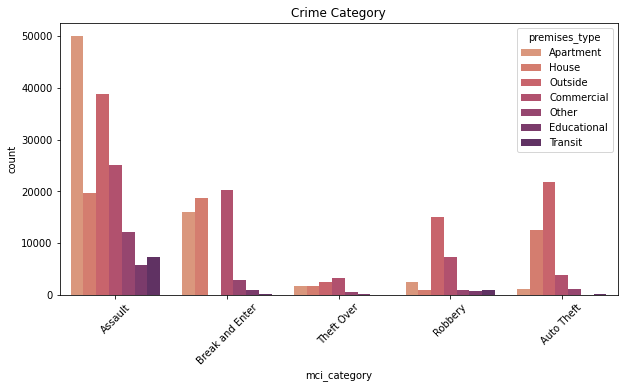

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=df1, x = 'mci_category', hue = 'premises_type',  palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Crime Category')
plt.show()

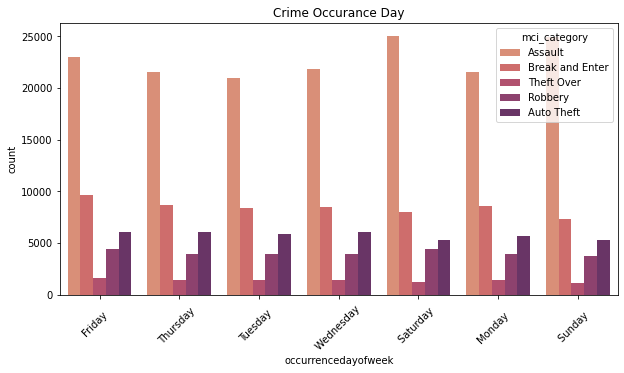

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=df1, x = 'occurrencedayofweek', hue = 'mci_category',  palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Crime Occurance Day')
plt.show()

##Deep Dive Question

###How does the crime rate change each year?

In [18]:
dd1 = df1[['mci_category']]

In [19]:
dd1['year'] = pd.DatetimeIndex(df1['occurrencedate']).year

<ipython-input-19-0bcc71bb4763>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd1['year'] = pd.DatetimeIndex(df1['occurrencedate']).year


In [20]:
dd1 = dd1[dd1['year']>2013]

In [21]:
dd1.groupby(['year','mci_category']).size().reset_index(name='count')

,year,mci_category,count
0,2014,Assault,16521
1,2014,Auto Theft,3589
2,2014,Break and Enter,7201
3,2014,Robbery,3623
4,2014,Theft Over,998
5,2015,Assault,17905
6,2015,Auto Theft,3247
7,2015,Break and Enter,6906
8,2015,Robbery,3478
9,2015,Theft Over,1032


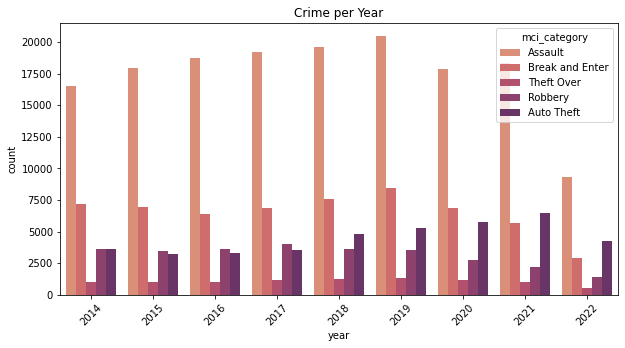

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=dd1, x = 'year', hue = 'mci_category',  palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Crime per Year')
plt.show()

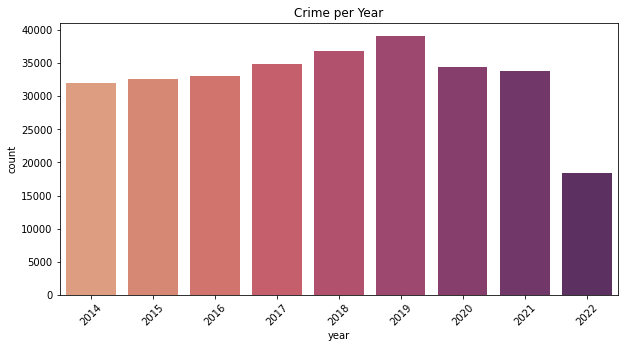

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=dd1, x = 'year', palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Crime per Year')
plt.show()

###The 10 most crime-ridden neighborhoods

In [24]:
dd2 = df1[['Neighbourhood']]
dd2['year'] = dd1['year']

<ipython-input-24-9cea095214f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd2['year'] = dd1['year']


In [25]:
dd21 = dd2.groupby(['Neighbourhood']).size().reset_index(name='count')
dd21 = dd21.sort_values(by=['count'], ascending=False).head(10)
dd21

,Neighbourhood,count
122,Waterfront Communities-The Island,11302
23,Church-Yonge Corridor,9940
6,Bay Street Corridor,8522
124,West Humber-Clairville,8102
79,Moss Park,7285
138,York University Heights,5889
33,Downsview-Roding-CFB,5730
62,Kensington-Chinatown,5707
132,Woburn,5351
58,Islington-City Centre West,4796


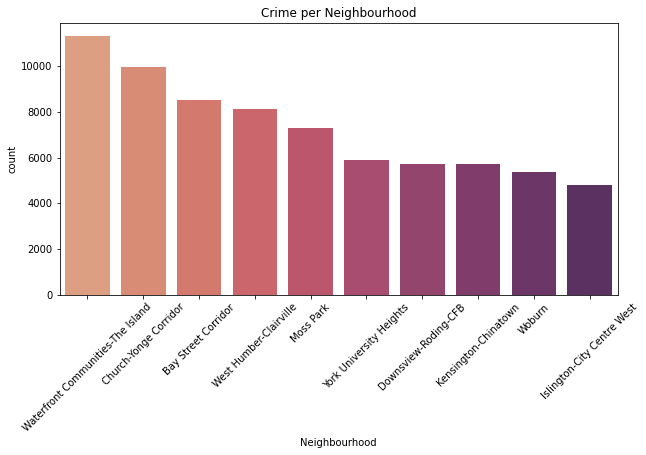

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=dd2, x = 'Neighbourhood', palette='flare',
              order=dd2.Neighbourhood.value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Crime per Neighbourhood')
plt.show()

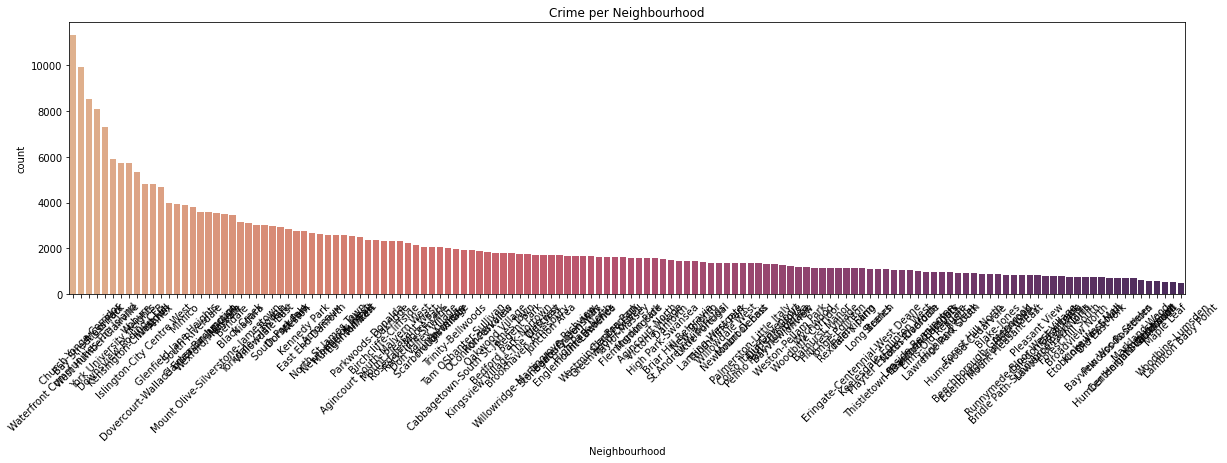

In [27]:
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(data=dd2, x = 'Neighbourhood', palette='flare',
              order=dd2.Neighbourhood.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Crime per Neighbourhood')
plt.show()

In [28]:
dd23 = df1[['Neighbourhood','Division']]
dd23 = dd23.drop_duplicates(keep="first")

In [29]:
dd22 = pd.merge(dd21,dd23,how='left',on='Neighbourhood')
dd22

,Neighbourhood,count,Division
0,Waterfront Communities-The Island,11302,D52
1,Waterfront Communities-The Island,11302,D14
2,Waterfront Communities-The Island,11302,D51
3,Waterfront Communities-The Island,11302,D22
4,Waterfront Communities-The Island,11302,D12
5,Waterfront Communities-The Island,11302,D55
6,Church-Yonge Corridor,9940,D51
7,Church-Yonge Corridor,9940,D52
8,Church-Yonge Corridor,9940,D53
9,Church-Yonge Corridor,9940,D12


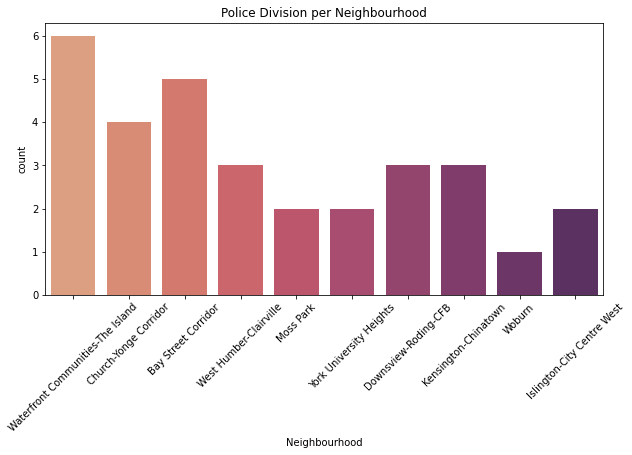

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=dd22, x = 'Neighbourhood', palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Police Division per Neighbourhood')
plt.show()

###What kind of places are most prone to crime?

In [31]:
dd3 = df1[['premises_type']]
dd3['year'] = dd1['year']

<ipython-input-31-2e69a063646a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd3['year'] = dd1['year']


In [32]:
dd31 = dd3.groupby(['premises_type']).size().reset_index(name='count')
dd31 = dd31.sort_values(by=['count'], ascending=False)
dd31

,premises_type,count
5,Outside,78099
0,Apartment,71207
1,Commercial,59936
3,House,53331
4,Other,17563
6,Transit,8392
2,Educational,7678


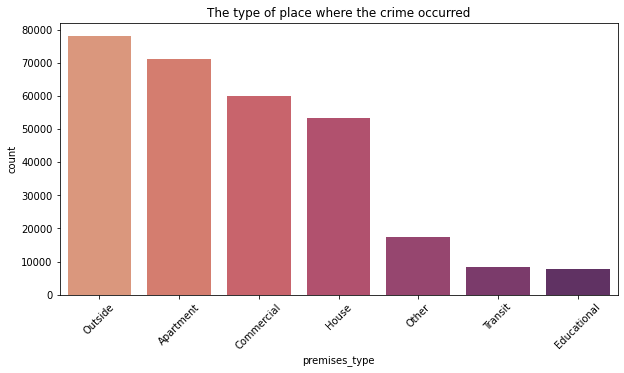

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=dd3, x = 'premises_type', palette='flare',
              order=dd3.premises_type.value_counts().iloc[:7].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('The type of place where the crime occurred')
plt.show()

In [34]:
location = []
for i in df1['premises_type']:
  if i == 'Outside':
    location.append('Outside')
  elif i == 'Apartment':
    location.append('Apartment')
  elif i == 'Commercial':
    location.append('Commercial')
  elif i == 'House':
    location.append('House')
  elif i == 'Other':
    location.append('Other')
  elif i == 'Transit':
    location.append('Other')
  elif i == 'Educational':
    location.append('Other')

df1['location'] = location
df1 = df1.drop(['premises_type'], axis=1)

<ipython-input-34-4647cc6e97b8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['location'] = location


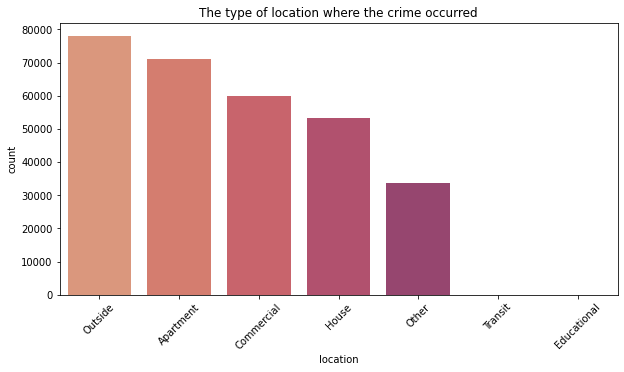

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=df1, x = 'location', palette='flare',
              order=dd3.premises_type.value_counts().iloc[:7].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('The type of location where the crime occurred')
plt.show()

##Data Preprocessing

###Feature Selection 2

In [36]:
df1['year'] = pd.DatetimeIndex(df1['occurrencedate']).year
df1 = df1[df1['year']>2013]

In [37]:
df2 = df1[['Neighbourhood','Hood_ID','location','year','Longitude','Latitude']]

In [38]:
df2['location'].unique()

array(['Apartment', 'House', 'Outside', 'Commercial', 'Other'],
      dtype=object)

In [39]:
Apartment = df2[df2['location'] == 'Apartment'].groupby(['Neighbourhood']).size().reset_index(name='count')
Apartment['Apartment'] = Apartment['count']
Apartment = Apartment.drop(['count'],axis=1)
Apartment

,Neighbourhood,Apartment
0,Agincourt North,122
1,Agincourt South-Malvern West,308
2,Alderwood,94
3,Annex,1033
4,Banbury-Don Mills,391
...,...,...
135,Wychwood,208
136,Yonge-Eglinton,160
137,Yonge-St.Clair,228
138,York University Heights,1314


In [40]:
House = df2[df2['location'] == 'House'].groupby(['Neighbourhood']).size().reset_index(name='count')
House['House'] = House['count']
House = House.drop(['count'],axis=1)
House

,Neighbourhood,House
0,Agincourt North,697
1,Agincourt South-Malvern West,525
2,Alderwood,265
3,Annex,420
4,Banbury-Don Mills,493
...,...,...
135,Wychwood,214
136,Yonge-Eglinton,154
137,Yonge-St.Clair,103
138,York University Heights,522


In [41]:
Outside = df2[df2['location'] == 'Outside'].groupby(['Neighbourhood']).size().reset_index(name='count')
Outside['Outside'] = Outside['count']
Outside = Outside.drop(['count'],axis=1)
Outside

,Neighbourhood,Outside
0,Agincourt North,417
1,Agincourt South-Malvern West,527
2,Alderwood,176
3,Annex,1060
4,Banbury-Don Mills,321
...,...,...
135,Wychwood,310
136,Yonge-Eglinton,265
137,Yonge-St.Clair,112
138,York University Heights,1706


In [42]:
Commercial = df2[df2['location'] == 'Commercial'].groupby(['Neighbourhood']).size().reset_index(name='count')
Commercial['Commercial'] = Commercial['count']
Commercial = Commercial.drop(['count'],axis=1)
Commercial

,Neighbourhood,Commercial
0,Agincourt North,203
1,Agincourt South-Malvern West,750
2,Alderwood,239
3,Annex,1336
4,Banbury-Don Mills,329
...,...,...
135,Wychwood,283
136,Yonge-Eglinton,278
137,Yonge-St.Clair,124
138,York University Heights,1681


In [43]:
Other = df2[df2['location'] == 'Other'].groupby(['Neighbourhood']).size().reset_index(name='count')
Other['Other'] = Other['count']
Other = Other.drop(['count'],axis=1)
Other

,Neighbourhood,Other
0,Agincourt North,118
1,Agincourt South-Malvern West,217
2,Alderwood,58
3,Annex,819
4,Banbury-Don Mills,128
...,...,...
135,Wychwood,143
136,Yonge-Eglinton,291
137,Yonge-St.Clair,28
138,York University Heights,643


In [44]:
df3_neighbourhood = pd.merge(Apartment,House,how='inner',on='Neighbourhood')
df3_neighbourhood = pd.merge(df3_neighbourhood,Outside,how='inner',on='Neighbourhood')
df3_neighbourhood = pd.merge(df3_neighbourhood,Commercial,how='inner',on='Neighbourhood')
df3_neighbourhood = pd.merge(df3_neighbourhood,Other,how='inner',on='Neighbourhood')
df3 = df3_neighbourhood.drop(['Neighbourhood'],axis=1)
df3_neighbourhood

,Neighbourhood,Apartment,House,Outside,Commercial,Other
0,Agincourt North,122,697,417,203,118
1,Agincourt South-Malvern West,308,525,527,750,217
2,Alderwood,94,265,176,239,58
3,Annex,1033,420,1060,1336,819
4,Banbury-Don Mills,391,493,321,329,128
...,...,...,...,...,...,...
135,Wychwood,208,214,310,283,143
136,Yonge-Eglinton,160,154,265,278,291
137,Yonge-St.Clair,228,103,112,124,28
138,York University Heights,1314,522,1706,1681,643


###Analysis

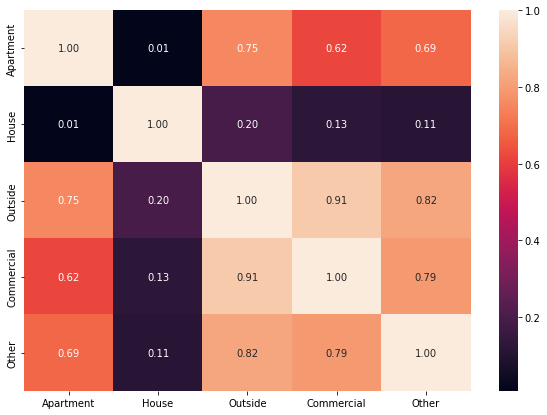

In [45]:
#Correlation Heatmap
corr = df3.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

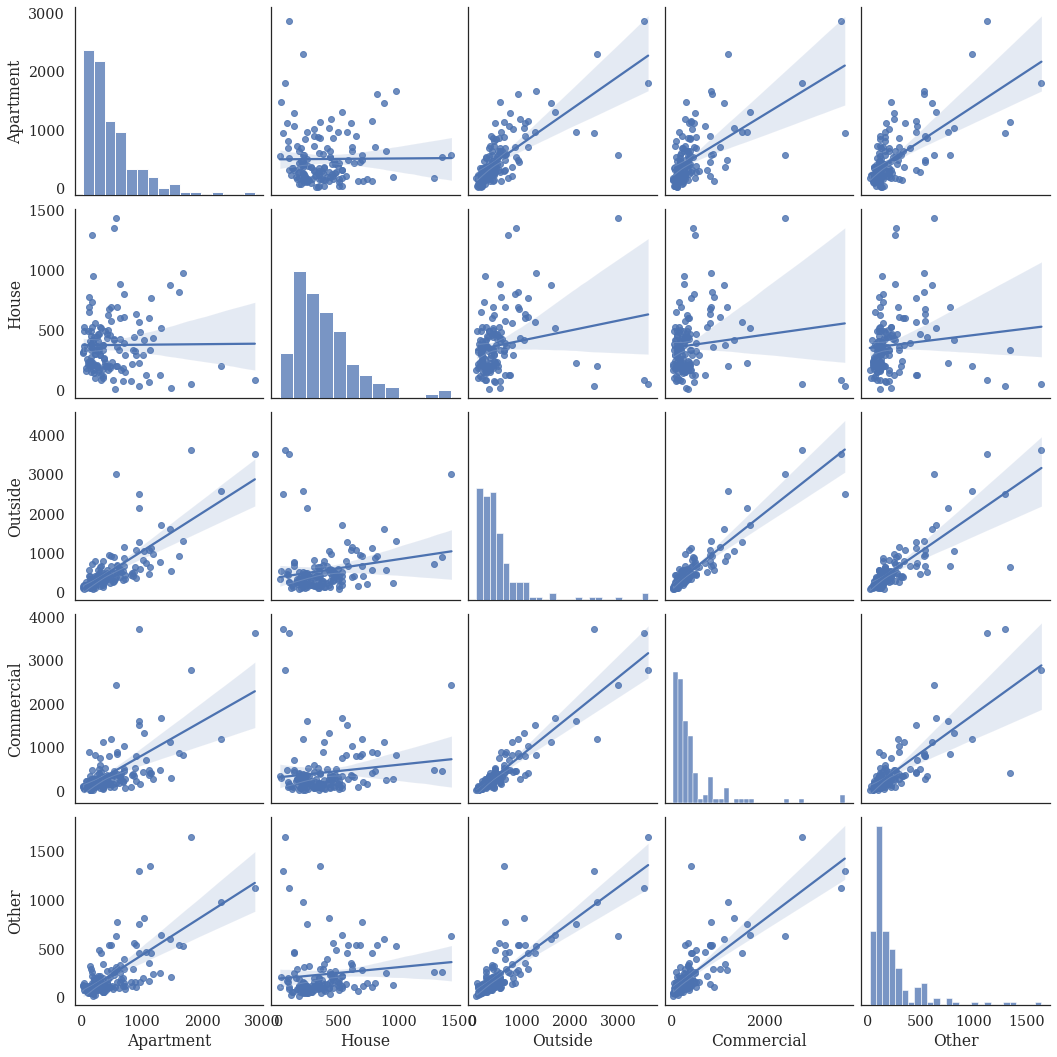

In [46]:
variables = np.array( ['Apartment', 'House', 'Outside', 'Commercial', 'Other'] )
sns.set( font_scale = 1.3, style = 'white' )
plt.rc('font', family='serif')

sns.pairplot( df3[ variables ],
             kind = 'reg',
             height= 3.0, aspect=1.0,
            )
plt.show()

###Outliers

####Log Transformation

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

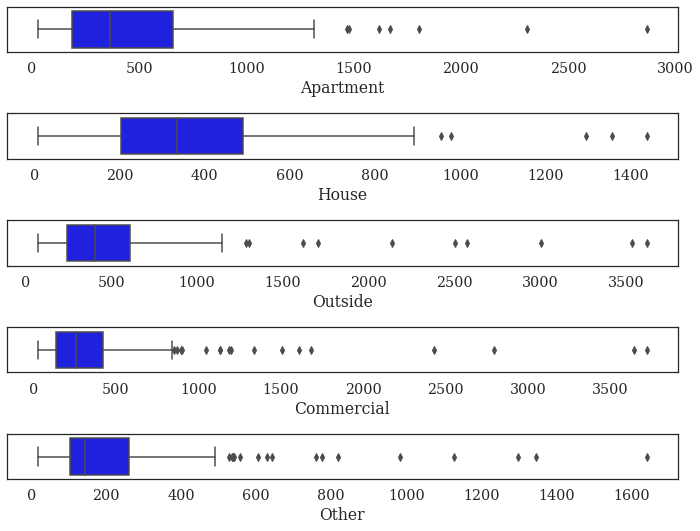

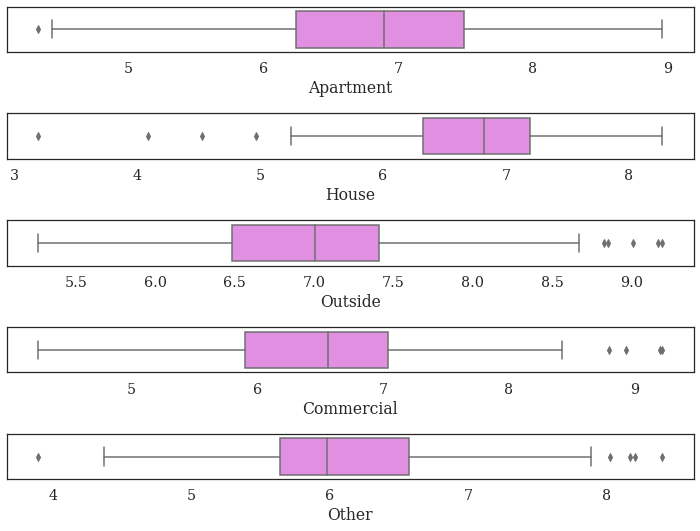

In [47]:
plt.figure(figsize=(10, 10))
for i in range(0, len(variables)):
    plt.subplot(7, 1, i+1)
    sns.boxplot(df3[variables[i]],orient='h',color='blue')
    plt.tight_layout()   

plt.figure(figsize=(10, 10))
for i in range(0, len(variables)):
    plt.subplot(7, 1, i+1)
    sns.boxplot(np.log1p(df3[variables[i]])+1,orient='h',color='violet')
    plt.tight_layout()

In [48]:
df4_neighbourhood = df3_neighbourhood.copy()

In [49]:
df4_neighbourhood['Apartment'] = np.log1p(df4_neighbourhood['Apartment'])
df4_neighbourhood['House'] = np.log1p(df4_neighbourhood['House'])
df4_neighbourhood['Outside'] = np.log1p(df4_neighbourhood['Outside'])
df4_neighbourhood['Commercial'] = np.log1p(df4_neighbourhood['Commercial'])
df4_neighbourhood['Other'] = np.log1p(df4_neighbourhood['Other'])

In [50]:
df4 = df4_neighbourhood.drop(['Neighbourhood'], axis=1)

###Scaling

In [51]:
df_std = StandardScaler().fit_transform(df4)
df4_scaled = pd.DataFrame(df_std, columns=list(df4))
df4_scaled.head(3)

,Apartment,House,Outside,Commercial,Other
0,-1.181173,1.114969,0.053138,-0.230877,-0.416418
1,-0.148021,0.740109,0.358023,1.102029,0.333226
2,-1.470886,-0.163267,-1.068355,-0.064664,-1.285207


##K-Means Modelling

###Finding The Best K

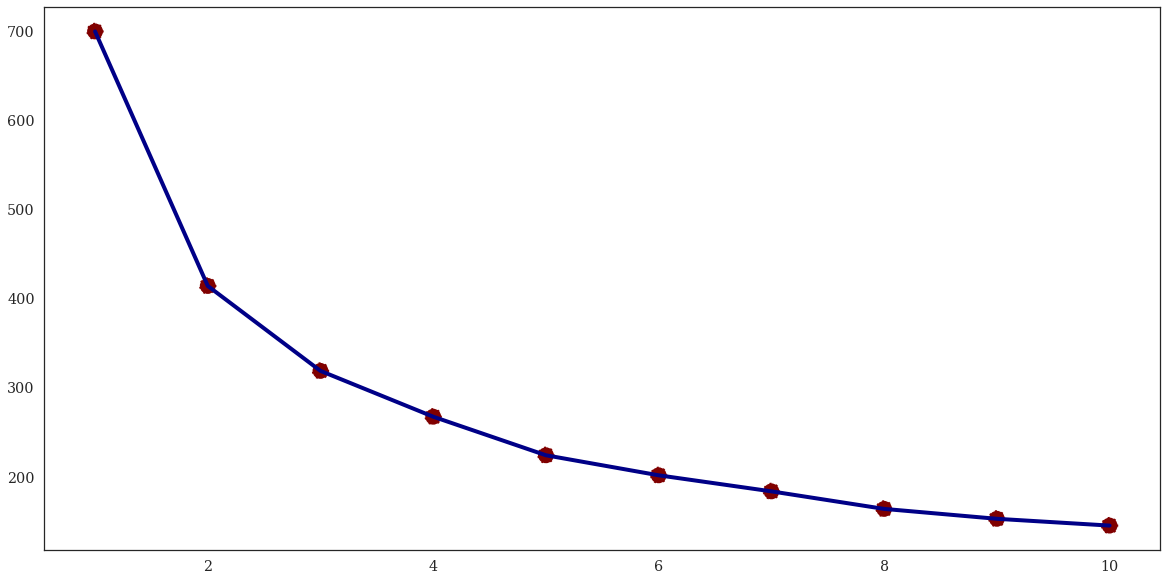

In [52]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df4_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

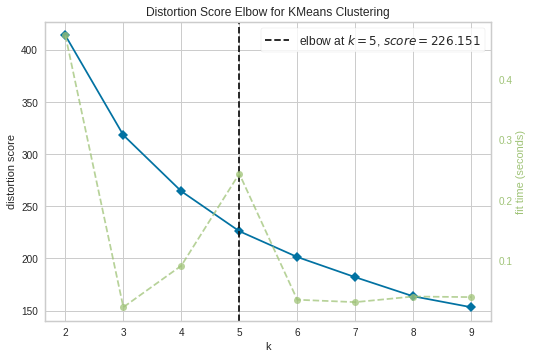

In [53]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(df4_scaled)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

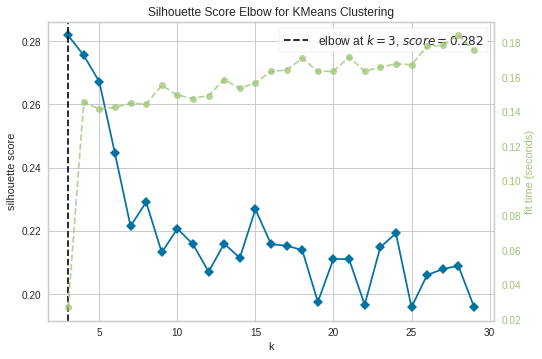

In [54]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(3,30),metric='silhouette', timings= True)
visualizer.fit(df4_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

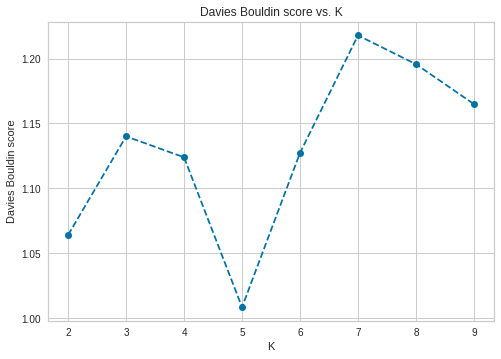

In [55]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(df4_scaled)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(df4_scaled, model)
    
    return score

scores = []
centers = list(range(2,10))
for center in centers:
    scores.append(get_kmeans_score(df4_scaled, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

###Modelling

In [56]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df4_scaled)
df4_scaled['clusters'] = kmeans.labels_
df3['clusters'] = kmeans.labels_


In [57]:
df3_neighbourhood['clusters'] = kmeans.labels_

In [58]:
display(df3.groupby('clusters').agg(['mean','median']))

Apartment               House             Outside          \
                 mean  median        mean median         mean  median   
clusters                                                                
0          834.035714   707.0  677.642857  607.0   984.892857   908.0   
1          401.262295   369.0  359.557377  336.0   407.934426   408.0   
2          159.972222   152.0  295.500000  286.5   170.444444   171.0   
3         1777.600000  1806.0  121.000000   84.0  2875.000000  2572.0   
4          819.500000   755.5   80.400000   81.5   503.100000   505.0   

           Commercial                Other          
                 mean  median         mean  median  
clusters                                            
0          790.607143   665.5   468.642857   457.0  
1          292.409836   266.0   153.950820   135.0  
2           96.750000    97.0    82.888889    77.0  
3         2593.800000  2796.0  1161.200000  1126.0  
4          337.100000   329.5   223.200000   186.0

##Visualization

In [59]:
cluster_distribution = df4_scaled['clusters'].value_counts().reset_index()
cluster_distribution.columns = ['cluster','number of users']
cluster_distribution

,cluster,number of users
0,1,61
1,2,36
2,0,28
3,4,10
4,3,5


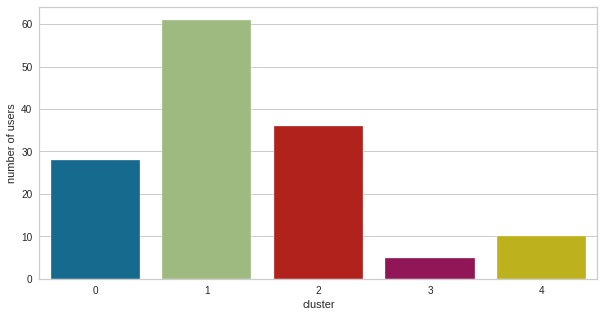

In [60]:
fig, ax = plt.subplots(figsize=(10,5))

g = sns.barplot(x = 'cluster',y='number of users',data=cluster_distribution,ax=ax)

x = np.arange(len(cluster_distribution['cluster']))
y = cluster_distribution['number of users']

In [61]:
X = df4_scaled.drop(['clusters'], axis = 1)
Y = df4_scaled['clusters']

In [65]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=5)
pca.fit(X)
pcs = pca.transform(X)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
pdf['clusters'] = Y
pdf.head()

,pc1,pc2,pc3,pc4,pc5,clusters
0,-0.761548,-1.355958,0.374327,-0.345966,0.435280,1
1,0.895919,-0.819002,0.448134,-0.494054,-0.324055,1
2,-1.914822,-0.118992,0.733493,-0.823927,-0.299849,2
3,3.090130,-0.346705,0.272691,0.353298,-0.392493,0
4,-0.085963,-0.558733,-0.300655,-0.340324,-0.413298,1


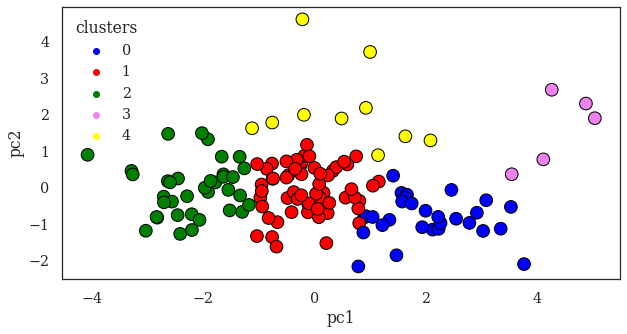

In [66]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(
    x="pc1", y="pc2", 
    hue="clusters",
    edgecolor='black',
    data=pdf,
    palette=['blue','red','green','violet','yellow'],
    s=160,
    ax=ax
)

In [67]:
display(df3.groupby('clusters').agg('median'))

,Apartment,House,Outside,Commercial,Other
clusters,,,,,
0,707.0,607.0,908.0,665.5,457.0
1,369.0,336.0,408.0,266.0,135.0
2,152.0,286.5,171.0,97.0,77.0
3,1806.0,84.0,2572.0,2796.0,1126.0
4,755.5,81.5,505.0,329.5,186.0


In [68]:
import plotly.graph_objects as go

categories = ['Apartment', 'House', 'Outside', 'Commercial', 'Other']
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[707.0,	607.0,	908.0,	665.5,	457.0],
      theta=categories,
      name='Group 1'
))
fig.add_trace(go.Scatterpolar(
      r=[369.0,	336.0,	408.0,	266.0,	135.0],
      theta=categories,
      name='Group 2'
))
fig.add_trace(go.Scatterpolar(
      r=[152.0,	286.5,	171.0,	97.0,	77.0],
      theta=categories,
      name='Group 3'
))
fig.add_trace(go.Scatterpolar(
      r=[1806.0,	84.0,	2572.0,	2796.0,	1126.0],
      theta=categories,
      name='Group 4'
))
fig.add_trace(go.Scatterpolar(
      r=[755.5,	81.5,	505.0,	329.5,	186.0],
      theta=categories,
      name='Group 5'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 2800]
    )),
  showlegend=True
)

fig.show()

In [69]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[707.0,	607.0,	908.0,	665.5,	457.0],
    theta=['Apartment', 'House', 'Outside', 'Commercial', 'Other']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [70]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[369.0,	336.0,	408.0,	266.0,	135.0],
    theta=['Apartment', 'House', 'Outside', 'Commercial', 'Other']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [71]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[152.0,	286.5,	171.0,	97.0,	77.0],
    theta=['Apartment', 'House', 'Outside', 'Commercial', 'Other']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [72]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[1806.0,	84.0,	2572.0,	2796.0,	1126.0],
    theta=['Apartment', 'House', 'Outside', 'Commercial', 'Other']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [73]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[755.5,	81.5,	505.0,	329.5,	186.0],
    theta=['Apartment', 'House', 'Outside', 'Commercial', 'Other']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

##Conclusion

In [73]:
cluster1 = df3_neighbourhood[df3_neighbourhood['clusters'] == 1]

In [74]:
cluster1['Neighbourhood'].unique()

array(['Agincourt North', 'Agincourt South-Malvern West',
       'Banbury-Don Mills', 'Bathurst Manor', 'Bayview Village',
       'Bedford Park-Nortown', 'Briar Hill-Belgravia',
       'Brookhaven-Amesbury', 'Cabbagetown-South St.James Town',
       'Clanton Park', 'Cliffcrest', 'Corso Italia-Davenport', 'Danforth',
       'Don Valley Village', 'Dufferin Grove', 'Eglinton East',
       'Englemount-Lawrence', 'Greenwood-Coxwell', 'High Park North',
       'High Park-Swansea', 'Hillcrest Village', 'Humber Summit',
       'Humbermede', 'Ionview', 'Junction Area',
       'Keelesdale-Eglinton West', 'Kingsview Village-The Westway',
       'Lansing-Westgate', 'Little Portugal', 'Long Branch', 'Milliken',
       'Morningside', 'Mount Dennis', 'New Toronto', 'Newtonbrook East',
       'North Riverdale', 'OConnor-Parkview', 'Oakridge',
       'Oakwood Village', 'Palmerston-Little Italy', 'Parkwoods-Donalda',
       'Pelmo Park-Humberlea', 'Playter Estates-Danforth',
       'Rexdale-Kipling', 'R

In [75]:
cluster0 = df3_neighbourhood[df3_neighbourhood['clusters'] == 0]
cluster0['Neighbourhood'].unique()

array(['Annex', 'Bendale', 'Birchcliffe-Cliffside', 'Black Creek',
       'Clairlea-Birchmount', 'Dorset Park',
       'Dovercourt-Wallace Emerson-Junction', 'Downsview-Roding-CFB',
       'East End-Danforth', 'Glenfield-Jane Heights',
       'Islington-City Centre West', 'Kennedy Park', 'LAmoreaux',
       'Malvern', 'Mimico', 'Mount Olive-Silverstone-Jamestown',
       'Newtonbrook West', 'Rosedale-Moore Park', 'Rouge',
       'South Riverdale', 'West Hill', 'West Humber-Clairville', 'Weston',
       'Wexford/Maryvale', 'Willowdale East', 'Woburn',
       'York University Heights', 'Yorkdale-Glen Park'], dtype=object)

In [76]:
cluster2 = df3_neighbourhood[df3_neighbourhood['clusters'] == 2]
cluster2['Neighbourhood'].unique()

array(['Alderwood', 'Bayview Woods-Steeles', 'Blake-Jones',
       'Bridle Path-Sunnybrook-York Mills', 'Broadview North',
       'Caledonia-Fairbank', 'Casa Loma', 'Centennial Scarborough',
       'Danforth East York', 'Edenbridge-Humber Valley',
       'Elms-Old Rexdale', 'Eringate-Centennial-West Deane',
       'Etobicoke West Mall', 'Forest Hill North', 'Forest Hill South',
       'Guildwood', 'Highland Creek', 'Humber Heights-Westmount',
       'Humewood-Cedarvale', 'Kingsway South', 'Lambton Baby Point',
       'Lawrence Park North', 'Lawrence Park South', 'Leaside-Bennington',
       'Maple Leaf', 'Markland Wood', 'Mount Pleasant East',
       'Old East York', 'Pleasant View', 'Princess-Rosethorn',
       'Runnymede-Bloor West Village', 'Rustic', 'Steeles',
       'Thistletown-Beaumond Heights', 'Woodbine-Lumsden',
       'Yonge-St.Clair'], dtype=object)

In [77]:
cluster3 = df3_neighbourhood[df3_neighbourhood['clusters'] == 3]
cluster3['Neighbourhood'].unique()

array(['Bay Street Corridor', 'Church-Yonge Corridor',
       'Kensington-Chinatown', 'Moss Park',
       'Waterfront Communities-The Island'], dtype=object)

In [78]:
cluster4 = df3_neighbourhood[df3_neighbourhood['clusters'] == 4]
cluster4['Neighbourhood'].unique()

array(['Beechborough-Greenbrook', 'Flemingdon Park', 'Henry Farm',
       'Mount Pleasant West', 'Niagara', 'North St.James Town',
       'Regent Park', 'South Parkdale', 'Thorncliffe Park', 'University'],
      dtype=object)

In [79]:
df3_neighbourhood

,Neighbourhood,Apartment,House,Outside,Commercial,Other,clusters
0,Agincourt North,122,697,417,203,118,1
1,Agincourt South-Malvern West,308,525,527,750,217,1
2,Alderwood,94,265,176,239,58,2
3,Annex,1033,420,1060,1336,819,0
4,Banbury-Don Mills,391,493,321,329,128,1
...,...,...,...,...,...,...,...
135,Wychwood,208,214,310,283,143,1
136,Yonge-Eglinton,160,154,265,278,291,1
137,Yonge-St.Clair,228,103,112,124,28,2
138,York University Heights,1314,522,1706,1681,643,0


In [82]:
df_cluster = df3_neighbourhood[['Neighbourhood','clusters']]

In [83]:
df2

,Neighbourhood,Hood_ID,location,year,Longitude,Latitude
0,York University Heights,N27,Apartment,2014,-79.504475,43.766371
1,Malvern,N132,House,2014,-79.217083,43.814861
2,Long Branch,N19,Outside,2014,-79.534957,43.589085
3,Thorncliffe Park,N55,Commercial,2014,-79.346588,43.703212
4,Islington-City Centre West,N14,Commercial,2014,-79.531916,43.645247
...,...,...,...,...,...,...
301227,Woodbine-Lumsden,N60,House,2022,-79.308515,43.695118
301228,Westminster-Branson,N35,House,2022,-79.455098,43.790363
301229,Woburn,N137,Outside,2022,-79.234954,43.775740
301230,Dorset Park,N126,Commercial,2022,-79.281037,43.765801


In [84]:
df_cluster = pd.merge(df2,df_cluster,how='left',on='Neighbourhood')
df_cluster

,Neighbourhood,Hood_ID,location,year,Longitude,Latitude,clusters
0,York University Heights,N27,Apartment,2014,-79.504475,43.766371,0
1,Malvern,N132,House,2014,-79.217083,43.814861,0
2,Long Branch,N19,Outside,2014,-79.534957,43.589085,1
3,Thorncliffe Park,N55,Commercial,2014,-79.346588,43.703212,4
4,Islington-City Centre West,N14,Commercial,2014,-79.531916,43.645247,0
...,...,...,...,...,...,...,...
294956,Woodbine-Lumsden,N60,House,2022,-79.308515,43.695118,2
294957,Westminster-Branson,N35,House,2022,-79.455098,43.790363,1
294958,Woburn,N137,Outside,2022,-79.234954,43.775740,0
294959,Dorset Park,N126,Commercial,2022,-79.281037,43.765801,0


###Cluster

In [86]:
df_c = df1[['Neighbourhood','location','year','mci_category']]

In [88]:
df_c['clusters'] =  df_cluster['clusters']

<ipython-input-88-8b197b702ca2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
cluster0 = df_c[df_c['clusters'] == 0]
cluster0.groupby(['location','mci_category']).size().reset_index(name='count')

,location,mci_category,count
0,Apartment,Assault,17299
1,Apartment,Auto Theft,353
2,Apartment,Break and Enter,5592
3,Apartment,Robbery,865
4,Apartment,Theft Over,567
5,Commercial,Assault,8597
6,Commercial,Auto Theft,1335
7,Commercial,Break and Enter,7093
8,Commercial,Robbery,2583
9,Commercial,Theft Over,1080


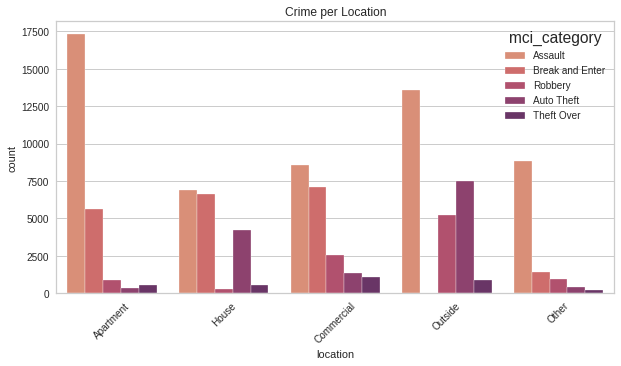

In [91]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=cluster0, x = 'location', hue = 'mci_category',  palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Crime per Location')
plt.show()

In [92]:
cluster1 = df_c[df_c['clusters'] == 1]
cluster1.groupby(['location','mci_category']).size().reset_index(name='count')

,location,mci_category,count
0,Apartment,Assault,16180
1,Apartment,Auto Theft,330
2,Apartment,Break and Enter,5301
3,Apartment,Robbery,856
4,Apartment,Theft Over,519
5,Commercial,Assault,8245
6,Commercial,Auto Theft,1271
7,Commercial,Break and Enter,6566
8,Commercial,Robbery,2436
9,Commercial,Theft Over,1087


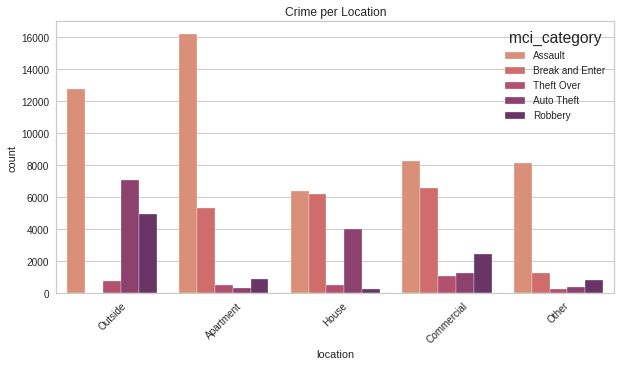

In [93]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=cluster1, x = 'location', hue = 'mci_category',  palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Crime per Location')
plt.show()

In [94]:
cluster2 = df_c[df_c['clusters'] == 2]
cluster2.groupby(['location','mci_category']).size().reset_index(name='count')

,location,mci_category,count
0,Apartment,Assault,4861
1,Apartment,Auto Theft,108
2,Apartment,Break and Enter,1456
3,Apartment,Robbery,236
4,Apartment,Theft Over,179
5,Commercial,Assault,2421
6,Commercial,Auto Theft,370
7,Commercial,Break and Enter,1974
8,Commercial,Robbery,718
9,Commercial,Theft Over,327


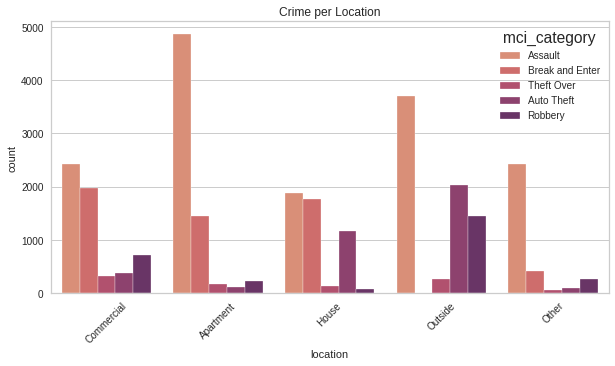

In [95]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=cluster2, x = 'location', hue = 'mci_category',  palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Crime per Location')
plt.show()

In [96]:
cluster3 = df_c[df_c['clusters'] == 3]
cluster3.groupby(['location','mci_category']).size().reset_index(name='count')

,location,mci_category,count
0,Apartment,Assault,7028
1,Apartment,Auto Theft,135
2,Apartment,Break and Enter,2275
3,Apartment,Robbery,319
4,Apartment,Theft Over,239
5,Commercial,Assault,3719
6,Commercial,Auto Theft,543
7,Commercial,Break and Enter,2922
8,Commercial,Robbery,994
9,Commercial,Theft Over,446


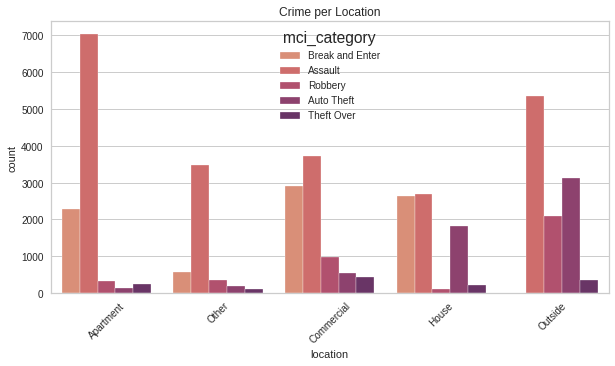

In [97]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=cluster3, x = 'location', hue = 'mci_category',  palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Crime per Location')
plt.show()

In [98]:
cluster4 = df_c[df_c['clusters'] == 4]
cluster4.groupby(['location','mci_category']).size().reset_index(name='count')

,location,mci_category,count
0,Apartment,Assault,3202
1,Apartment,Auto Theft,76
2,Apartment,Break and Enter,1045
3,Apartment,Robbery,175
4,Apartment,Theft Over,104
5,Commercial,Assault,1592
6,Commercial,Auto Theft,245
7,Commercial,Break and Enter,1402
8,Commercial,Robbery,524
9,Commercial,Theft Over,201


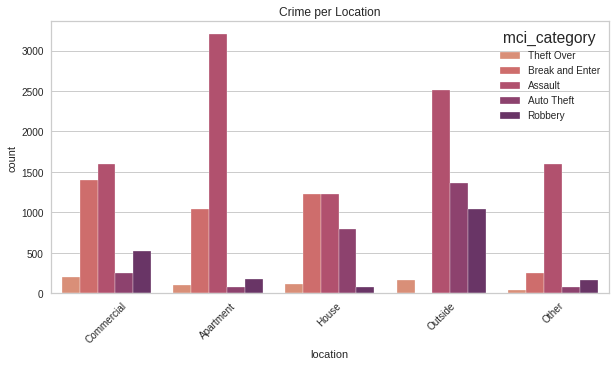

In [99]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=cluster4, x = 'location', hue = 'mci_category',  palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Crime per Location')
plt.show()

In [102]:
import IPython.display
from IPython.display import Image

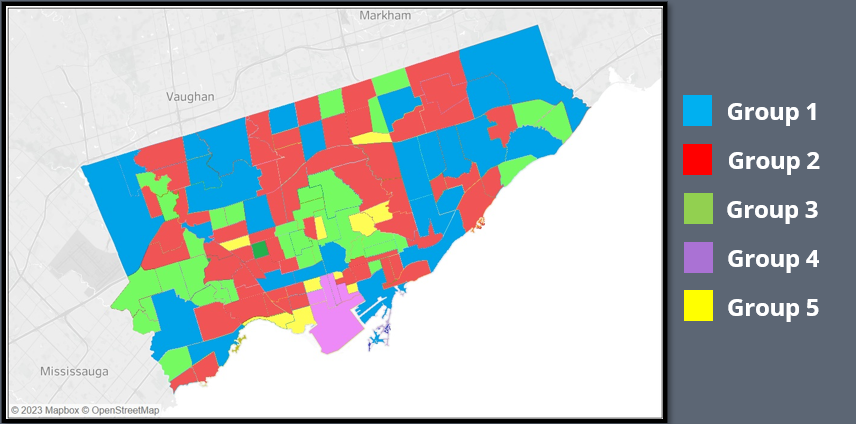

In [104]:
Image('/content/drive/MyDrive/python/FinPro_Muthia Aisyah Putri/crime_toronto2.png')